<a href="https://colab.research.google.com/github/Smasko7/Machine-Learning-Course/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error
from scipy import stats
from sklearn import tree
import itertools
from sklearn.model_selection import GridSearchCV


## 1. EDA

In [ ]:
df = pd.DataFrame(pd.read_csv("wine-missing.csv"))
df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df_type = df['type']
df_rest = df.drop(['type'], axis=1)
df_rest.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


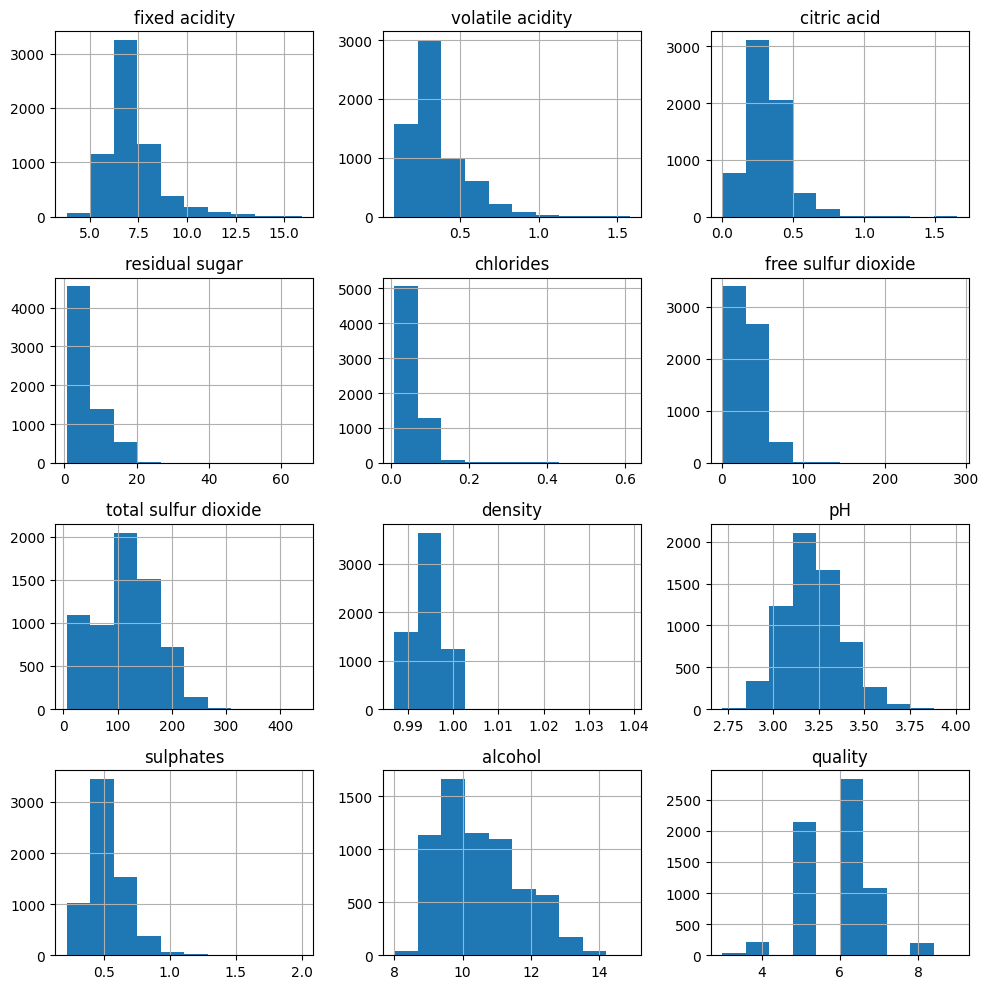

In [ ]:
df_rest.hist(figsize = (10,10))
plt.tight_layout()
plt.show()

From the above statistical measurements and histograms of each feature, we can conclude that many features are significantly right-skewed (e.g. residual sugar, chlorides, volatile acidity etc).

Generally, the feature scale differs from feature to feature, which may be a sign for scaling necessity. For example, citric acid, volatile acidity, chlorides, density and sulphates seem to have a small scale (between 0 and 1) compared to other features like free and total sulfur dioxide.

Density has a really low standard deviation (std=0.003) compared to its mean value (mu=0.99), which means it may not affect our model predictions. On the contrary, features like residual sugar, sulfur dioxide and volatile acidity appear to have large variances with respect to their mean values.

PH seems to be normally distributed and it is found between 2.7 and 4, which implies that wines are acids.

Some outliers appear in some features, such as in residual sugar (65.8), total sulfur dioxide (440) etc.

Finally, the quality is a metric with integer values inside the 0-10 scale, but has 3 and 9 as min and max values respectively.

### Wine Type Bar Plot

/tmp/ipython-input-1815076276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette=custom_colors)


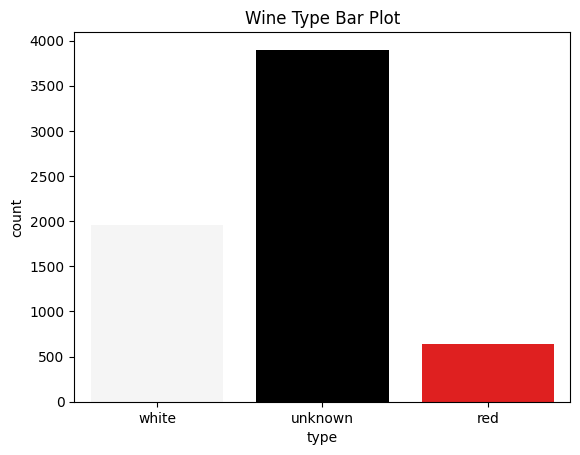

In [ ]:
custom_colors = ['#F5F5F5', 'black', 'red']   # example

sns.countplot(x='type', data=df, palette=custom_colors)
plt.title("Wine Type Bar Plot")
plt.show()


From the wine type bar plot, we can observe that the majority of recorded wine samples is of unknown type. Also, the white wine samples are significantly more than the red ones.

## 2. Replace the categorical type values with 0,1 and 2

In [ ]:
df['type'] = df['type'].replace({'white':0, 'red':1, 'unknown':2})
df_type = df_type.replace({'white':0, 'red':1, 'unknown':2})
x = df_rest.to_numpy()
y = df_type.to_numpy()


/tmp/ipython-input-2331236015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace({'white':0, 'red':1, 'unknown':2})
/tmp/ipython-input-2331236015.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_type = df_type.replace({'white':0, 'red':1, 'unknown':2})


## 3. Split the dataset into known and unknown datasets

In [ ]:
idx_known = (y == 0) | (y == 1)
x_known = x[idx_known]
y_known = y[idx_known]

idx_unknown = (y == 2)
x_unknown = x[idx_unknown]


## 4. Split the known dataset into train and test

In [ ]:
X_known_train, X_known_test, y_known_train, y_known_test = train_test_split(x_known, y_known, test_size=0.3, random_state=42,
                                                                            stratify=y_known)



## 5. Random Forest

It is noted that the random forest can deal with the small number of features' missing values.

In [ ]:
def get_evaluation_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)

  return acc, f1, prec, recall

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_known_train, y_known_train)

y_pred_known_train = rf.predict(X_known_train)
y_pred_known_test = rf.predict(X_known_test)

acc_train, f1_train, prec_train, recall_train = get_evaluation_metrics(y_known_train, y_pred_known_train)
acc_test, f1_test, prec_test, recall_test = get_evaluation_metrics(y_known_test, y_pred_known_test)

### Print the evaluation metrics

In [ ]:
print(f"Training Accuracy: {acc_train}")
print(f"Training F1 Score: {f1_train}")
print(f"Training Precision: {prec_train}")
print(f"Training Recall: {recall_train}")

print(f"Testing Accuracy: {acc_test}")
print(f"Testing F1 Score: {f1_test}")
print(f"Testing Precision: {prec_test}")
print(f"Testing Recall: {recall_test}")

Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9987179487179487
Testing F1 Score: 0.9974025974025974
Testing Precision: 0.9948186528497409
Testing Recall: 1.0


### Accuracy or F1?

In [ ]:
numof_white = sum(y_known_test == 0)
numof_red = sum(y_known_test == 1)

print(f"Number of white wines in test set: {numof_white}")
print(f"Number of red wines in test set: {numof_red}")

Number of white wines in test set: 588
Number of red wines in test set: 192


The most indicative evaluation metric for the specific dataset is F1, because it leverages both recall and precision. On the contrary, accuracy could be misleading, especially in an imbalanced dataset like the wine dataset we are dealing with (25% red wines - 75% white wines). In other words, a naive model that always predicts that the tested wine is white, will get a 75% accuracy, which is not indicative of the actual model's performance.

## 6. Balanced Weights

According to the scikit-learn documentation, the class_weight = 'balanced' balances the importance of the 2 classes for the model, as it automatically adjust weights inversely proportional to class frequencies ( n_samples / (n_classes * np.bincount(y)) ). This means that the weight for white wine class will be ~ 4/3* 1/2 and for red wine ~ 4 * 1/2. These weights will affect the training procedure and result in different splitting, because more priority/importance will be given to the rare class (red wine).

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_known_train, y_known_train)

y_pred_known_train = rf.predict(X_known_train)
y_pred_known_test = rf.predict(X_known_test)

acc_train, f1_train, prec_train, recall_train = get_evaluation_metrics(y_known_train, y_pred_known_train)
acc_test, f1_test, prec_test, recall_test = get_evaluation_metrics(y_known_test, y_pred_known_test)

print(f"Training Accuracy: {acc_train}")
print(f"Training F1 Score: {f1_train}")
print(f"Training Precision: {prec_train}")
print(f"Training Recall: {recall_train}")

print(f"Testing Accuracy: {acc_test}")
print(f"Testing F1 Score: {f1_test}")
print(f"Testing Precision: {prec_test}")
print(f"Testing Recall: {recall_test}")

Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9948717948717949
Testing F1 Score: 0.9895287958115183
Testing Precision: 0.9947368421052631
Testing Recall: 0.984375


Now that the balanced weights hyperparameter has been applied, we can see a small drop in test evaluation metrics.

## 7-9. Predict Probabilities for classes, label the currently unknown samples that pass the probability threshold and create the new dataset

In [ ]:
y_unknown_proba = rf.predict_proba(x_unknown)

proba_red = y_unknown_proba[:, 1]

y_unknown_pred = np.array([2] * len(x_unknown))

y_unknown_pred[(proba_red > 0.65)] = 1

y_unknown_pred[(proba_red < 0.35)] = 0


x_labeled = x_unknown[np.isin(y_unknown_pred, [0, 1])]
y_labeled = y_unknown_pred[np.isin(y_unknown_pred, [0, 1])]


print(f"Labeled {len(y_labeled)} new data samples")
print("New labeled red wines: ", sum(y_labeled == 1))
print("New labeled white wines: ", sum(y_labeled == 0))


x_train_new = np.vstack([X_known_train, x_labeled])
y_train_new = np.concatenate([y_known_train, y_labeled])
# y_train_new = np.array(y_train_new, dtype=int).reshape(-1)

print("Original training size:", len(X_known_train))
print("New training size:", len(x_train_new))





Labeled 3847 new data samples
New labeled red wines:  908
New labeled white wines:  2939
Original training size: 1819
New training size: 5666


### Train the balanced-weighted Random Forest classifier on the updated dataset

In [ ]:
rf3 = RandomForestClassifier(random_state=42, class_weight="balanced")
rf3.fit(x_train_new, y_train_new)

y_pred_new_train = rf3.predict(X_known_train)
y_pred_new_test = rf3.predict(X_known_test)


acc_train, f1_train, prec_train, recall_train = get_evaluation_metrics(y_known_train, y_pred_new_train)
acc_test, f1_test, prec_test, recall_test = get_evaluation_metrics(y_known_test, y_pred_new_test)

print("Evaluation metrics on original train/test datasets of actually known labels. The model used is a Random Forest trained on new (augmented) dataset.\n")

print(f"Training Accuracy: {acc_train}")
print(f"Training F1 Score: {f1_train}")
print(f"Training Precision: {prec_train}")
print(f"Training Recall: {recall_train}")

print(f"Testing Accuracy: {acc_test}")
print(f"Testing F1 Score: {f1_test}")
print(f"Testing Precision: {prec_test}")
print(f"Testing Recall: {recall_test}")

Evaluation metrics on original train/test datasets of actually known labels. The model used is a Random Forest trained on new (augmented) dataset.

Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9948717948717949
Testing F1 Score: 0.9895287958115183
Testing Precision: 0.9947368421052631
Testing Recall: 0.984375


## 10. Repeat the procedure until no other unknown samples can be predicted with probability (confidence) that passes the threshold

In [ ]:
iterations = 0

while len(y_labeled) > 0:

  if iterations >= 100:
    break

  print(f"\n\nITERATION: {iterations+1} \n")

  rf3 = RandomForestClassifier(random_state=42, class_weight="balanced")
  rf3.fit(x_train_new, y_train_new)

  x_unknown = x_unknown[np.isin(y_unknown_pred, 2)]
  print("New unknown samples: ", len(x_unknown))

  y_unknown_proba = rf3.predict_proba(x_unknown)

  proba_red = y_unknown_proba[:, 1]

  y_unknown_pred = np.array([2] * len(x_unknown))

  y_unknown_pred[(proba_red > 0.65)] = 1

  y_unknown_pred[(proba_red < 0.35)] = 0


  x_labeled = x_unknown[np.isin(y_unknown_pred, [0, 1])]
  y_labeled = y_unknown_pred[np.isin(y_unknown_pred, [0, 1])]


  print(f"Labeled {len(y_labeled)} new data samples")
  print("New labeled red wines: ", sum(y_labeled == 1))
  print("New labeled white wines: ", sum(y_labeled == 0))

  x_train_previous = x_train_new

  x_train_new = np.vstack([x_train_new, x_labeled])
  y_train_new = np.concatenate([y_train_new, y_labeled])
  # y_train_new = np.array(y_train_new, dtype=int).reshape(-1)


  print("Previous training size:", len(x_train_previous))
  print("New training size:", len(x_train_new))



  y_pred_new_train = rf3.predict(X_known_train)
  y_pred_new_test = rf3.predict(X_known_test)

  acc_train, f1_train, prec_train, recall_train = get_evaluation_metrics(y_known_train, y_pred_new_train)
  acc_test, f1_test, prec_test, recall_test = get_evaluation_metrics(y_known_test, y_pred_new_test)

  print(f"\n\nTraining Accuracy: {acc_train}")
  print(f"Training F1 Score: {f1_train}")
  print(f"Training Precision: {prec_train}")
  print(f"Training Recall: {recall_train}")

  print(f"Testing Accuracy: {acc_test}")
  print(f"Testing F1 Score: {f1_test}")
  print(f"Testing Precision: {prec_test}")
  print(f"Testing Recall: {recall_test}")

  iterations+=1



ITERATION: 1 

New unknown samples:  51
Labeled 23 new data samples
New labeled red wines:  10
New labeled white wines:  13
Previous training size: 5666
New training size: 5689


Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9948717948717949
Testing F1 Score: 0.9895287958115183
Testing Precision: 0.9947368421052631
Testing Recall: 0.984375


ITERATION: 2 

New unknown samples:  28
Labeled 2 new data samples
New labeled red wines:  1
New labeled white wines:  1
Previous training size: 5689
New training size: 5691


Training Accuracy: 0.999450247388675
Training F1 Score: 0.9988851727982163
Training Precision: 0.9977728285077951
Training Recall: 1.0
Testing Accuracy: 0.9961538461538462
Testing F1 Score: 0.9921259842519685
Testing Precision: 1.0
Testing Recall: 0.984375


ITERATION: 3 

New unknown samples:  26
Labeled 5 new data samples
New labeled red wines:  3
New labeled white

Generally, it seems that this repetitive procedure enhances the model's performance on test data, as we gradually get slightly better test evaluation metrics. This means that the semi-supervised method of predicting and labeling the unknown classes samples and adding them to the training dataset, eventually improves the model. This is a way to deal with datasets with many unlabeled values.

# Part 2 - Model Evaluation

In [ ]:
df = pd.DataFrame(pd.read_csv("wine-full.csv"))
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 1. Quality feature

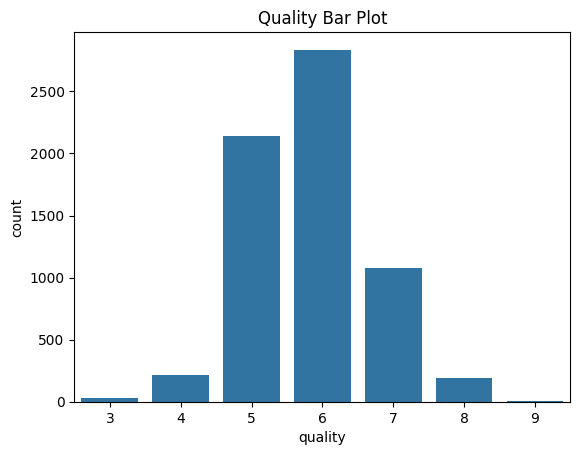

In [ ]:
df_quality = pd.DataFrame(df['quality'])
sns.countplot(x='quality', data=df_quality)
plt.title("Quality Bar Plot")
plt.show()

From the above bar plot is seems that the 'quality' feature of the wine dataset is imbalanced, as its most frequent values are, by far, the 6,5 and 7 (in that order). There are no many samples with very low and very high quality scores.

## 2. Red or White Wine?

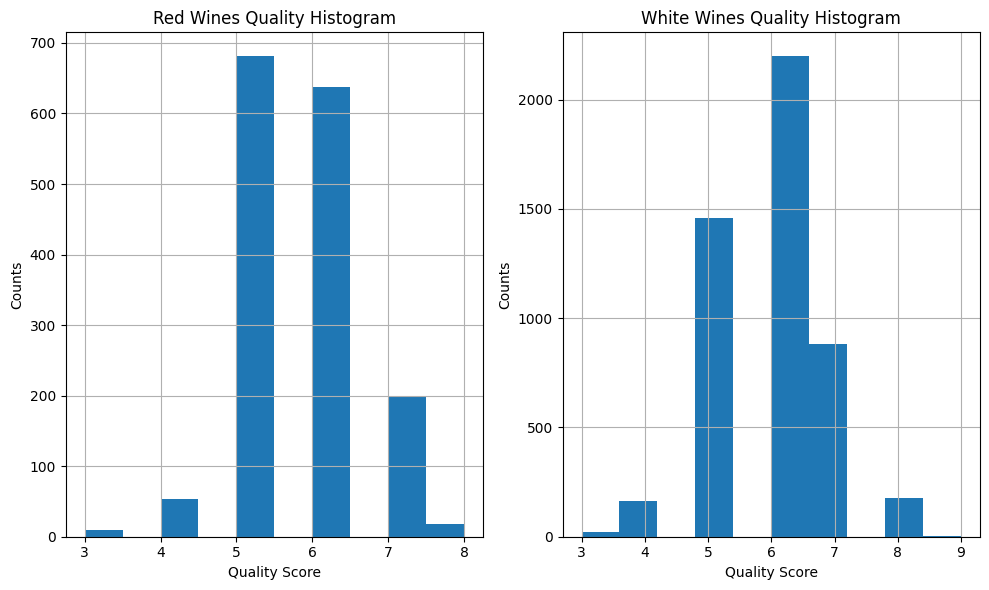

In [ ]:
Red = df[df['type'] == 'red']
White = df[df['type'] == 'white']

Red_quality = Red['quality']
White_quality = White['quality']

fig, ax = plt.subplots(1,2,figsize=(10, 6))
axes = ax.flatten()

Red_quality.hist(ax=axes[0])
axes[0].set_title("Red Wines Quality Histogram")
axes[0].set_xlabel("Quality Score")
axes[0].set_ylabel('Counts')

White_quality.hist(ax=axes[1])
axes[1].set_title("White Wines Quality Histogram")
axes[1].set_xlabel("Quality Score")
axes[1].set_ylabel('Counts')

plt.tight_layout()
plt.show()

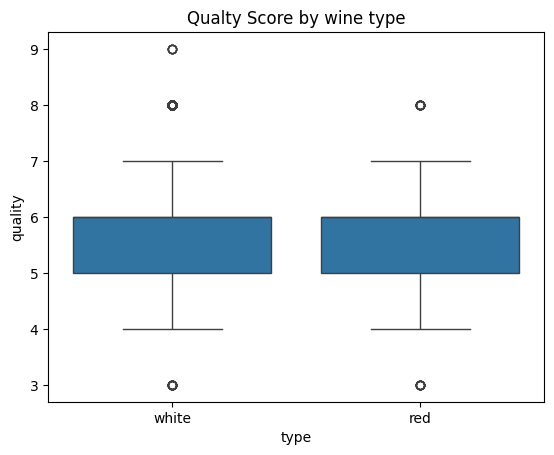

In [ ]:
sns.boxplot(x='type', y='quality', data=df)
plt.title('Qualty Score by wine type')
plt.show()

Looking both histograms (which indicate the quality distribution of the red and white wines), but also the boxplot, it seems that the 2 types enjoy similar quality scores. Further statistical analysis must be made to claim that one type is better than the other.

### Statistical analysis

In [ ]:
Red_mean_quality = Red_quality.mean()
White_mean_quality = White_quality.mean()

grouped = df.groupby('type')['quality']
summary = grouped.agg(['count','mean','median','std','min','max'])
print(summary)

Mean quality score for red wines: 5.6360225140712945
Mean quality score for white wines: 5.87790935075541
       count      mean  median       std  min  max
type                                              
red     1599  5.636023     6.0  0.807569    3    8
white   4898  5.877909     6.0  0.885639    3    9


It is observed that white wines have slightly higher mean quality score. Now, we will check if this difference in mean values is statistically significant.

In [36]:
t_stat, t_p = stats.ttest_ind(Red_quality, White_quality)
print(f"t-test: t = {t_stat:.4f}, p = {t_p:.4e}")

t-test: t = -9.6856, p = 4.8881e-22


The p-value is << 0.05 , thus we can conclude that there is statistical significance for the difference in means of the two whine types. **Thus, we conclude that the white type is better.**

## 3. Sweet or Dry Wine?

We will define when a wine is considered "Dry", "Semi-Sweet" and "Sweet", based on the residual sugar levels:

Dry: Residual Sugar < 4 g/L.

Semi-Sweet: 4 <= Residual Sugar <= 12 g/L.

Sweet: Residual Sugar > 12 g/L.

The same procedure as before will be followed to determine wether sweet or dry wine has more quality score.

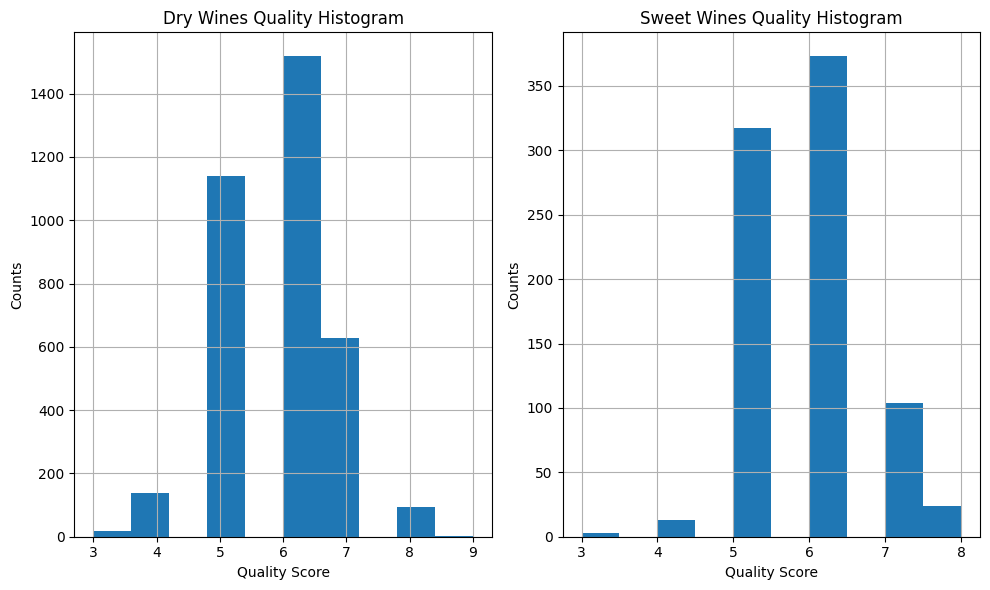

In [37]:
Dry = df[df['residual sugar'] < 4]
Semi_Sweet = df[(df['residual sugar'] >= 4) & (df['residual sugar'] <= 12)]
Sweet = df[df['residual sugar'] > 12]

Dry_quality = Dry['quality']
Sweet_quality = Sweet['quality']

fig, ax = plt.subplots(1,2,figsize=(10, 6))
axes = ax.flatten()

Dry_quality.hist(ax=axes[0])
axes[0].set_title("Dry Wines Quality Histogram")
axes[0].set_xlabel("Quality Score")
axes[0].set_ylabel('Counts')

Sweet_quality.hist(ax=axes[1])
axes[1].set_title("Sweet Wines Quality Histogram")
axes[1].set_xlabel("Quality Score")
axes[1].set_ylabel('Counts')

plt.tight_layout()
plt.show()


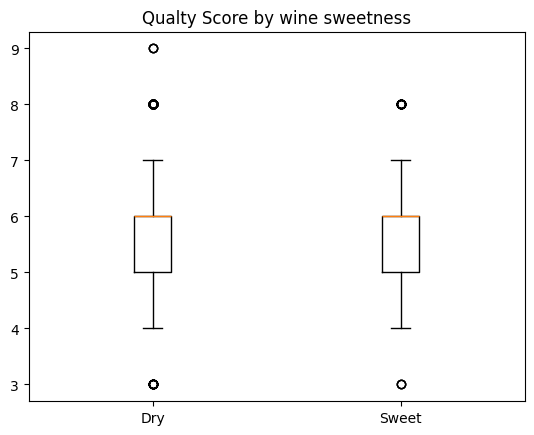

In [42]:
plt.boxplot([Dry_quality, Sweet_quality])
plt.xticks([1, 2], ['Dry', 'Sweet'])
plt.title('Qualty Score by wine sweetness')
plt.show()

In [49]:
Dry_mean_quality = Dry_quality.mean()
Sweet_mean_quality = Sweet_quality.mean()

print(f"Dry mean quality: {Dry_mean_quality}")
print(f"Sweet mean quality: {Sweet_mean_quality}")

t_stat, t_p = stats.ttest_ind(Dry_quality, Sweet_quality)
print(f"Sweetness t-test: t = {t_stat:.4f}, p = {t_p:.4e}")

Dry mean quality: 5.818592822831309
Sweet mean quality: 5.7601918465227815
Sweetness t-test: t = 1.7431, p = 8.1383e-02


It seems that histograms, boxplots and the quality means for the 2 categories are pretty similar. Besides, the t-test does not give statistical significance to the mean difference. Thus, we conclude that no clear claim can be made about wether dry or sweet wines are better, based on the classification that is made. If the threshold is different (e.g. Dry --> sugar < 12 and Sweet --> sugar > 12), we would probably end up with a different conclusion.

## 4-5. Train a Decision Tree Regressor

In [63]:
df.dropna(inplace=True)

df['type'] = df['type'].replace({'white':0, 'red':1, 'unknown':2})

x = df.drop(['quality'], axis=1).to_numpy()
y = df['quality'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)



In [65]:
regressor = tree.DecisionTreeRegressor()
regressor = regressor.fit(x_train, y_train)

y_hat_test = regressor.predict(x_test)
y_hat_train = regressor.predict(x_train)


test_MAE = mean_absolute_error(y_test, y_hat_test)
train_MAE = mean_absolute_error(y_train, y_hat_train)

print(f"Train MAE: {train_MAE}")
print(f"Test MAE: {test_MAE}")

Train MAE: 0.0
Test MAE: 0.44049459041731065


## 6. MAE Reliabilty --> Repeated Holdout

In [68]:
iterations = 10
MAE_list = []

for i in range(iterations):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)

  regressor = tree.DecisionTreeRegressor()
  regressor = regressor.fit(x_train, y_train)

  y_hat_test = regressor.predict(x_test)

  test_MAE = mean_absolute_error(y_test, y_hat_test)

  MAE_list.append(test_MAE)

  print(f"Iteration: {i}")
  print(f"Test MAE: {test_MAE}\n")

meanMAE = np.mean(MAE_list)
stdMAE = np.std(MAE_list)

print(f"Mean MAE: {meanMAE}")
print(f"Std MAE: {stdMAE}")

Lower_bound = meanMAE - stdMAE
Upper_bound = meanMAE + stdMAE

print(f"The expected MAE is between [{Lower_bound},{Upper_bound}]")

Iteration: 0
Test MAE: 0.45440494590417313

Iteration: 1
Test MAE: 0.4945904173106646

Iteration: 2
Test MAE: 0.4605873261205564

Iteration: 3
Test MAE: 0.4265842349304482

Iteration: 4
Test MAE: 0.4482225656877898

Iteration: 5
Test MAE: 0.46831530139103555

Iteration: 6
Test MAE: 0.45131375579598143

Iteration: 7
Test MAE: 0.4435857805255023

Iteration: 8
Test MAE: 0.45440494590417313

Iteration: 9
Test MAE: 0.5224111282843895

Mean MAE: 0.46244204018547136
Std MAE: 0.0260082823426283
The expected MAE is between [0.43643375784284305,0.48845032252809967]


So, to better estimate the actual MAE metric, we apply repeated holdout (split the dataset N times with different random seeds each time). Then, the expected MAE can be found in the [μ-σ, μ+σ] region.

Alternatively, we could find the confidence interval for the MAE:

In [73]:
confidence_level = 0.95

CI = stats.t.interval(confidence_level, df=len(MAE_list)-1, loc=np.mean(MAE_list), scale=np.std(MAE_list, ddof=1) / np.sqrt(len(MAE_list)))
print(f"Confidence Iterval (95%): [{CI[0]}, {CI[1]}]")

Confidence Iterval (95%): [0.44283043278716855, 0.48205364758377417]


## 7. Fine Tuning in Validation Set (fixed holdout)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


max_depths = [None, 3, 5, 7, 9]
max_features_list = [None, 'sqrt', 'log2']

results = []

for depth, feat in itertools.product(
    max_depths, max_features_list
):
    clf = tree.DecisionTreeRegressor(
        max_depth=depth,
        max_features=feat,
        random_state=0
    )

    clf.fit(x_train, y_train)

    y_hat_validation = clf.predict(x_validation)
    y_hat_train = clf.predict(x_train)

    train_MAE = mean_absolute_error(y_hat_train, y_train)
    validation_MAE = mean_absolute_error(y_hat_validation, y_validation)

    results.append({
        'max_depth': depth,
        # 'min_samples_split': split,
        'max_features': feat,
        'train_MAE': train_MAE,
        'validation_MAE': validation_MAE
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='validation_MAE', ascending=True).reset_index(drop=True)

results_df



,max_depth,max_features,train_MAE,validation_MAE
0,NaN,sqrt,0.000000,0.487113
1,NaN,log2,0.000000,0.487113
2,NaN,None,0.000000,0.518900
3,7.0,None,0.486541,0.566938
4,9.0,None,0.415811,0.578373
5,5.0,None,0.537594,0.580925
6,3.0,None,0.582918,0.612439
7,9.0,sqrt,0.453485,0.613375
8,9.0,log2,0.453485,0.613375
9,7.0,sqrt,0.531488,0.624869


## 8.
It is obvious that the validation dataset is more reliable than the training dataset for the hyperparameter selection, because the models may overfit their training datasets and perform poorly on unseen data. Thus, we need the validation step, which is part of the model selection, in order to achieve the best possible balance between bias and variance of the model. Then, to fairly evaluate our selected model, we should test it on test dataset, which is the only dataset that was not involved in the model selection process.

So, we would select the model with the lowest validation MAE, which in our case has not specific max depth = 5 considers sqrt(total_features) features for each split.

## 9. Sklearn GridSearch

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

parameters = {'max_depth':[None, 3, 5, 7, 9], 'max_features':[None, 'sqrt', 'log2']}

model = tree.DecisionTreeRegressor()

grid = GridSearchCV(model, parameters, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
grid.fit(x_train, y_train)



GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 3, 5, 7, 9],
                         'max_features': [None, 'sqrt', 'log2']},
             scoring='neg_mean_absolute_error')

In [87]:
print("Best MAE:", -grid.best_score_)

best_model = grid.best_estimator_
print("\nBest model:", best_model)

Best MAE: 0.47988300773048004

Best model: DecisionTreeRegressor()


## 10. Most Reliable Validation Methodology
The most reliable methodology among the 3 examined (Repeated Holdout, Finetuning in fixed validation set and Exhaustive 10-fold cross-validation), is the last one, because it (sort of) combines the first 2. Specifically, it uses 10-fold cross-validation, which means that the training set is split in 10 non-overlapping subsets and we get the mean MAE from the 10 different splits. Thus, by finetuning over all hyperparameter combinations on all 10 non-overlapping validation sets and get the mean MAE measures for extra reliability, this method is by far the best.

In repeated holdout, we just change the random seed, which may lead to overlapping sets, which means not all samples are used for training.

On the other side, the second method used a fixed validation set, so it did not exploit the whole dataset as well. Also, there was only one MAE metric per model, which decreases the evaluation's reliability.

## 11. Fixed Max Depth

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

parameters = {'min_samples_split':[2,3,4,5,6], 'max_features':[None, 'sqrt', 'log2']}

model = tree.DecisionTreeRegressor(max_depth=5)

grid = GridSearchCV(model, parameters, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
grid.fit(x_train, y_train)

print("Best MAE:", -grid.best_score_)

best_model = grid.best_estimator_
print("\nBest model:", best_model)

Best MAE: 0.5690715386694039

Best model: DecisionTreeRegressor(max_depth=5, min_samples_split=3)


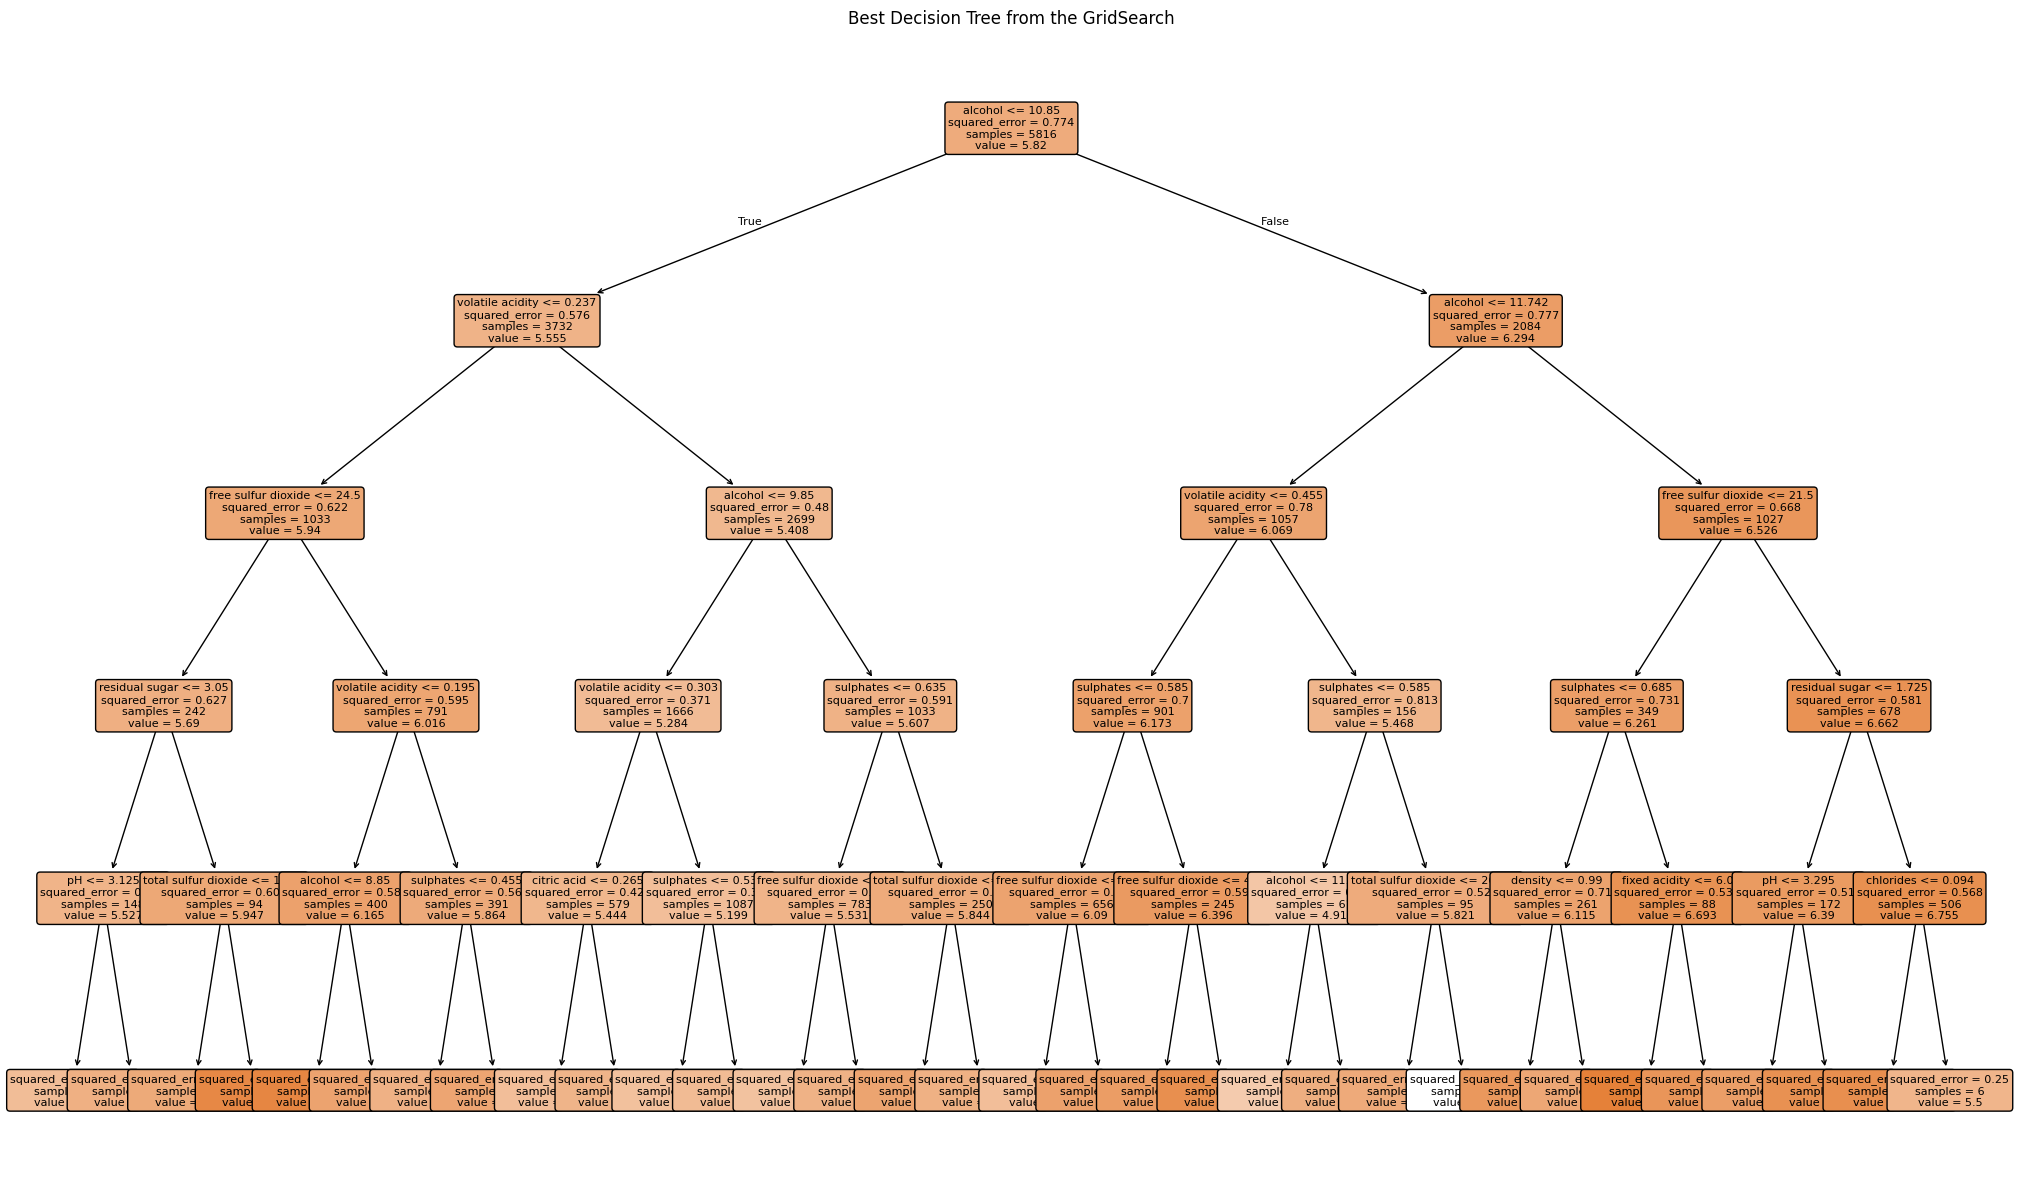

In [94]:
feature_names = df.drop(['quality'], axis=1).columns

plt.figure(figsize=(25, 15))
tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Best Decision Tree from the GridSearch")
plt.show()

It seems that the most important feature is the alcohol, as it is at the top of the tree. Volatile acidity is also an important indicator, as it is located high in the tree as well.

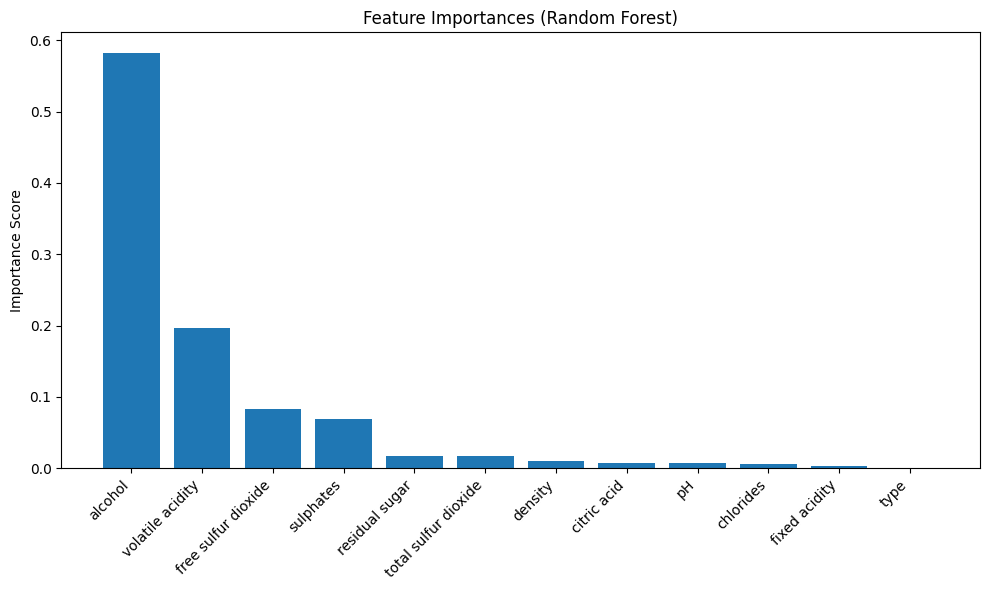

In [92]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]



plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha='right')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
